In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)


In [3]:
pima.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [4]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable


In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [7]:
import pandas as pd

print(X_train.dtypes)  # Check data types
print(X_train.head())  # Preview first few rows


pregnant    object
insulin     object
bmi         object
age         object
glucose     object
bp          object
pedigree    object
dtype: object
    pregnant insulin   bmi age glucose  bp pedigree
88         2      71  38.5  26     100  68    0.324
684        4       0  32.3  27     125  80    0.536
551        1       0  27.4  21     116  70    0.204
147        9       0  32.8  41      57  80    0.096
482        0       0  35.2  29     123  88    0.197


In [9]:
import pandas as pd

# Apply one-hot encoding to categorical columns
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1)

# Fill missing columns in X_test with 0 (if any)
X_test.fillna(0, inplace=True)


In [10]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)  # Train the model
y_pred = clf.predict(X_test)  # Predict on test data


In [11]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[120,  30,   0],
       [ 55,  25,   0],
       [  1,   0,   0]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

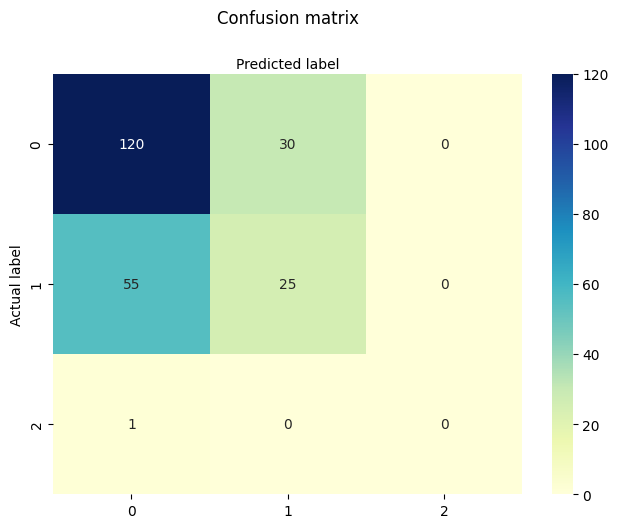

In [13]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

